In [1]:
# Necessary packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Specify where to save the processed files as sa vepath
#path = 'H:/Downloads/PhD-Atif/Warren_2019-master'
path = '/Users/frestie/Desktop/DissertationProject/data.txt'

## Loading the raw data

In [3]:
df = pd.read_csv('dat.txt', sep='\t', header=0)

In [4]:
df

,value,id,channel,patient_type,patient_id,replicate,subject_group,patrep_id,cell_id,colour,type
0,3.403409,1,SDHA,control,C02,1,Control,C02R01,C02R01_0001,#0000FF0A,mean intensity
1,3.664688,2,SDHA,control,C02,1,Control,C02R01,C02R01_0002,#0000FF0A,mean intensity
2,6.227979,3,SDHA,control,C02,1,Control,C02R01,C02R01_0003,#0000FF0A,mean intensity
3,3.478873,4,SDHA,control,C02,1,Control,C02R01,C02R01_0004,#0000FF0A,mean intensity
4,4.957944,5,SDHA,control,C02,1,Control,C02R01,C02R01_0005,#0000FF0A,mean intensity
...,...,...,...,...,...,...,...,...,...,...,...
245575,186.000000,751,yCoord,patient,P07,1,MT-TL1,P07R01,P07R01_0751,#FF00000A,mean intensity
245576,141.000000,752,yCoord,patient,P07,1,MT-TL1,P07R01,P07R01_0752,#FF00000A,mean intensity
245577,120.000000,753,yCoord,patient,P07,1,MT-TL1,P07R01,P07R01_0753,#FF00000A,mean intensity
245578,99.000000,754,yCoord,patient,P07,1,MT-TL1,P07R01,P07R01_0754,#FF00000A,mean intensity


### Exploring the categorical columns

In [5]:
df_categorical = df[['channel','patient_type','patient_id','replicate','subject_group','patrep_id','colour','type']]


In [6]:
for col in df_categorical:
    print(df_categorical[col].unique())

['SDHA' 'LOG_SDHA' 'MED_SDHA' 'NDUFB8' 'LOG_NDUFB8' 'MED_NDUFB8' 'OSCP'
 'LOG_OSCP' 'MED_OSCP' 'GRIM19' 'LOG_GRIM19' 'MED_GRIM19' 'VDAC1'
 'LOG_VDAC1' 'MED_VDAC1' 'COX4+4L2' 'LOG_COX4+4L2' 'MED_COX4+4L2' 'MTCO1'
 'LOG_MTCO1' 'MED_MTCO1' 'UqCRC2' 'LOG_UqCRC2' 'MED_UqCRC2' 'Area'
 'AspectRatio' 'Perimeter' 'Circularity' 'xCoord' 'yCoord']
['control' 'patient']
['C02' 'C01' 'C03' 'P10' 'P04' 'P02' 'P05' 'P01' 'P08' 'P03' 'P09' 'P07']
[1]
['Control' 'MT-TW' 'Deletion' 'CI' 'MT-TL1' 'MT-TG' 'MT-TE']
['C02R01' 'C01R01' 'C03R01' 'P10R01' 'P04R01' 'P02R01' 'P05R01' 'P01R01'
 'P08R01' 'P03R01' 'P09R01' 'P07R01']
['#0000FF0A' '#FF00000A']
['mean intensity' 'log mean intensity' 'median intensity' 'area'
 'aspect ratio' 'perimeter' 'circularity']


In [7]:
df['channel'] = df['channel'].str.replace('GRIM19','NDUFA13')

In [8]:
df.channel.unique()

array(['SDHA', 'LOG_SDHA', 'MED_SDHA', 'NDUFB8', 'LOG_NDUFB8',
       'MED_NDUFB8', 'OSCP', 'LOG_OSCP', 'MED_OSCP', 'NDUFA13',
       'LOG_NDUFA13', 'MED_NDUFA13', 'VDAC1', 'LOG_VDAC1', 'MED_VDAC1',
       'COX4+4L2', 'LOG_COX4+4L2', 'MED_COX4+4L2', 'MTCO1', 'LOG_MTCO1',
       'MED_MTCO1', 'UqCRC2', 'LOG_UqCRC2', 'MED_UqCRC2', 'Area',
       'AspectRatio', 'Perimeter', 'Circularity', 'xCoord', 'yCoord'],
      dtype=object)

In [9]:
df.groupby('patient_id').cell_id.nunique()

patient_id
C01     148
C02     289
C03     131
P01     337
P02     232
P03    1361
P04     879
P05    1878
P07     755
P08     628
P09     946
P10     602
Name: cell_id, dtype: int64

## Reshaping the dataframe 

In [10]:
#df1=df.pivot(index=['cell_id','subject_group'], columns = ['channel'],values =['value'])

df1= pd.pivot_table(df, index=['cell_id','patient_type','subject_group','patient_id','colour'], columns = ['channel'],values =['value'])

In [11]:
pd.set_option('display.max_columns', None)
df1

value  \
channel                                                        Area   
cell_id     patient_type subject_group patient_id colour              
C01R01_0001 control      Control       C01        #0000FF0A   879.0   
C01R01_0002 control      Control       C01        #0000FF0A  2556.0   
C01R01_0003 control      Control       C01        #0000FF0A  6432.0   
C01R01_0004 control      Control       C01        #0000FF0A  3072.0   
C01R01_0005 control      Control       C01        #0000FF0A  8734.5   
...                                                             ...   
P10R01_0598 patient      MT-TW         P10        #FF00000A  1858.0   
P10R01_0599 patient      MT-TW         P10        #FF00000A  3970.5   
P10R01_0600 patient      MT-TW         P10        #FF00000A  1458.0   
P10R01_0601 patient      MT-TW         P10        #FF00000A  1276.5   
P10R01_0602 patient      MT-TW         P10        #FF00000A  1339.5   

                                                                         \
channel                                                     AspectRatio   
cell_id     patient_type subject_group patient_id colour                  
C01R01_0001 control      Control       C01        #0000FF0A    0.448980   
C01R01_0002 control      Control       C01        #0000FF0A    0.876923   
C01R01_0003 control      Control       C01        #0000FF0A    0.800000   
C01R01_0004 control      Control       C01        #0000FF0A    1.157143   
C01R01_0005 control      Control       C01        #0000FF0A    1.595238   
...                                                                 ...   
P10R01_0598 patient      MT-TW         P10        #FF00000A    2.000000   
P10R01_0599 patient      MT-TW         P10        #FF00000A    1.451613   
P10R01_0600 patient      MT-TW         P10        #FF00000A    2.900000   
P10R01_0601 patient      MT-TW         P10        #FF00000A    3.133333   
P10R01_0602 patient      MT-TW         P10        #FF00000A    1.555556   

                                                                        \
channel                                                       COX4+4L2   
cell_id     patient_type subject_group patient_id colour                 
C01R01_0001 control      Control       C01        #0000FF0A   4.926230   
C01R01_0002 control      Control       C01        #0000FF0A   9.064356   
C01R01_0003 control      Control       C01        #0000FF0A   7.408696   
C01R01_0004 control      Control       C01        #0000FF0A   8.756881   
C01R01_0005 control      Control       C01        #0000FF0A   5.994460   
...                                                                ...   
P10R01_0598 patient      MT-TW         P10        #FF00000A   8.157025   
P10R01_0599 patient      MT-TW         P10        #FF00000A   8.354244   
P10R01_0600 patient      MT-TW         P10        #FF00000A  13.741228   
P10R01_0601 patient      MT-TW         P10        #FF00000A  15.060748   
P10R01_0602 patient      MT-TW         P10        #FF00000A   7.575000   

                                                                         \
channel                                                     Circularity   
cell_id     patient_type subject_group patient_id colour                  
C01R01_0001 control      Control       C01        #0000FF0A    0.667624   
C01R01_0002 control      Control       C01        #0000FF0A    0.662271   
C01R01_0003 control      Control       C01        #0000FF0A    0.484423   
C01R01_0004 control      Control       C01        #0000FF0A    0.608063   
C01R01_0005 control      Control       C01        #0000FF0A    0.705084   
...                                                                 ...   
P10R01_0598 patient      MT-TW         P10        #FF00000A    0.240837   
P10R01_0599 patient      MT-TW         P10        #FF00000A    0.409971   
P10R01_0600 patient      MT-TW         P10        #FF00000A    0.198452   
P10R01_0601 patient      MT-TW         P10        #FF00000A    0.228461   
P10R

In [12]:
df2= df1.reset_index()

In [13]:
df2

cell_id patient_type subject_group patient_id     colour   value  \
channel                                                                  Area   
0        C01R01_0001      control       Control        C01  #0000FF0A   879.0   
1        C01R01_0002      control       Control        C01  #0000FF0A  2556.0   
2        C01R01_0003      control       Control        C01  #0000FF0A  6432.0   
3        C01R01_0004      control       Control        C01  #0000FF0A  3072.0   
4        C01R01_0005      control       Control        C01  #0000FF0A  8734.5   
...              ...          ...           ...        ...        ...     ...   
8181     P10R01_0598      patient         MT-TW        P10  #FF00000A  1858.0   
8182     P10R01_0599      patient         MT-TW        P10  #FF00000A  3970.5   
8183     P10R01_0600      patient         MT-TW        P10  #FF00000A  1458.0   
8184     P10R01_0601      patient         MT-TW        P10  #FF00000A  1276.5   
8185     P10R01_0602      patient         MT-TW        P10  #FF00000A  1339.5   

                                                                               \
channel AspectRatio   COX4+4L2 Circularity LOG_COX4+4L2 LOG_MTCO1 LOG_NDUFA13   
0          0.448980   4.926230    0.667624     3.528312  1.512562    1.718303   
1          0.876923   9.064356    0.662271     6.656274  1.763175    2.777602   
2          0.800000   7.408696    0.484423     5.569829  1.652074    2.207175   
3          1.157143   8.756881    0.608063     7.275473  1.843152    2.923391   
4          1.595238   5.994460    0.705084     4.253457  1.421162    1.760127   
...             ...        ...         ...          ...       ...         ...   
8181       2.000000   8.157025    0.240837     6.455170  1.407893    1.904649   
8182       1.451613   8.354244    0.409971     7.325609  1.150830    1.477179   
8183       2.900000  13.741228    0.198452    11.432586  1.307792    1.628173   
8184       3.133333  15.060748    0.228461    13.320255  1.817468    3.064791   
8185       1.555556   7.575000    0.240358     6.022850  1.099101    1.324772   

                                                                            \
channel LOG_NDUFB8   LOG_OSCP   LOG_SDHA LOG_UqCRC2 LOG_VDAC1 MED_COX4+4L2   
0         1.926028   2.092291   2.498110   2.793981  1.574617          4.0   
1         2.671580   2.926415   4.195481   4.720006  1.753394          7.0   
2         2.160935   2.409333   3.632043   3.797937  1.552955          6.0   
3         2.566386   2.976915   4.496332   4.825183  1.750554          8.0   
4         1.769816   2.003908   2.789748   2.704791  1.469509          4.0   
...            ...        ...        ...        ...       ...          ...   
8181      1.519806  10.240695  13.661039  10.582099  2.976675          7.0   
8182      1.191700  21.188446  44.385100  14.004130  5.544963          8.0   
8183      1.312752  40.187626  63.152782  28.195734  9.497522         12.0   
8184      2.606018   4.084147   5.848844   8.787500  2.405839         14.0   
8185      1.206204  14.693705  33.566143   9.559546  4.394516          6.0   

                                                                       \
channel MED_MTCO1 MED_NDUFA13 MED_NDUFB8 MED_OSCP MED_SDHA MED_UqCRC2   
0             1.0         2.0        2.0      2.0      2.0        3.0   
1             2.0         3.0        3.0      3.0      4.0        5.0   
2             2.0         2.0        2.0      2.0      4.0        4.0   
3             2.0         3.0        3.0      3.0      5.0        5.0   
4             1.0         2.0        2.0      2.0      3.0        3.0   
...           ...         ...        ...      ...      ...        ...   
8181          1.0         2.0        1.0     11.0     15.0       10.0   
8182          1.0         1.0        1.0     23.0     47.0       15.0   
8183          1.0         1.0        1.0     41.0     62.0       30.0   
8184          2.0         3.0        3.0      4.0      6.0        9.0   
8185          

In [14]:
df2= df2.rename(columns={"value":""})

In [15]:
list(df2.columns)

[('cell_id', ''),
 ('patient_type', ''),
 ('subject_group', ''),
 ('patient_id', ''),
 ('colour', ''),
 ('', 'Area'),
 ('', 'AspectRatio'),
 ('', 'COX4+4L2'),
 ('', 'Circularity'),
 ('', 'LOG_COX4+4L2'),
 ('', 'LOG_MTCO1'),
 ('', 'LOG_NDUFA13'),
 ('', 'LOG_NDUFB8'),
 ('', 'LOG_OSCP'),
 ('', 'LOG_SDHA'),
 ('', 'LOG_UqCRC2'),
 ('', 'LOG_VDAC1'),
 ('', 'MED_COX4+4L2'),
 ('', 'MED_MTCO1'),
 ('', 'MED_NDUFA13'),
 ('', 'MED_NDUFB8'),
 ('', 'MED_OSCP'),
 ('', 'MED_SDHA'),
 ('', 'MED_UqCRC2'),
 ('', 'MED_VDAC1'),
 ('', 'MTCO1'),
 ('', 'NDUFA13'),
 ('', 'NDUFB8'),
 ('', 'OSCP'),
 ('', 'Perimeter'),
 ('', 'SDHA'),
 ('', 'UqCRC2'),
 ('', 'VDAC1'),
 ('', 'xCoord'),
 ('', 'yCoord')]

In [16]:
df2.columns = [f'{i}{j}' for i, j in df2.columns]
df2.columns = df2.columns.map(''.join)
#df2.columns = df2.columns.map('{0[0]}{0[1]}'.format) 

In [17]:
df2

,cell_id,patient_type,subject_group,patient_id,colour,Area,AspectRatio,COX4+4L2,Circularity,LOG_COX4+4L2,LOG_MTCO1,LOG_NDUFA13,LOG_NDUFB8,LOG_OSCP,LOG_SDHA,LOG_UqCRC2,LOG_VDAC1,MED_COX4+4L2,MED_MTCO1,MED_NDUFA13,MED_NDUFB8,MED_OSCP,MED_SDHA,MED_UqCRC2,MED_VDAC1,MTCO1,NDUFA13,NDUFB8,OSCP,Perimeter,SDHA,UqCRC2,VDAC1,xCoord,yCoord
0,C01R01_0001,control,Control,C01,#0000FF0A,879.0,0.448980,4.926230,0.667624,3.528312,1.512562,1.718303,1.926028,2.092291,2.498110,2.793981,1.574617,4.0,1.0,2.0,2.0,2.0,2.0,3.0,2.0,1.737705,2.122951,2.409836,2.573770,128.627417,3.131148,3.377049,1.778689,704.0,1710.0
1,C01R01_0002,control,Control,C01,#0000FF0A,2556.0,0.876923,9.064356,0.662271,6.656274,1.763175,2.777602,2.671580,2.926415,4.195481,4.720006,1.753394,7.0,2.0,3.0,3.0,3.0,4.0,5.0,2.0,2.143564,3.608911,3.301980,3.752475,220.225396,5.202970,5.737624,2.049505,717.0,1651.0
2,C01R01_0003,control,Control,C01,#0000FF0A,6432.0,0.800000,7.408696,0.484423,5.569829,1.652074,2.207175,2.160935,2.409333,3.632043,3.797937,1.552955,6.0,2.0,2.0,2.0,2.0,4.0,4.0,1.0,1.918841,2.739130,2.646377,2.968116,408.475175,4.539130,4.681159,1.791304,775.0,1647.0
3,C01R01_0004,control,Control,C01,#0000FF0A,3072.0,1.157143,8.756881,0.608063,7.275473,1.843152,2.923391,2.566386,2.976915,4.496332,4.825183,1.750554,8.0,2.0,3.0,3.0,3.0,5.0,5.0,2.0,2.165138,3.577982,3.077982,3.550459,251.965509,5.399083,5.678899,2.045872,731.0,1595.0
4,C01R01_0005,control,Control,C01,#0000FF0A,8734.5,1.595238,5.994460,0.705084,4.253457,1.421162,1.760127,1.769816,2.003908,2.789748,2.704791,1.469509,4.0,1.0,2.0,2.0,2.0,3.0,3.0,1.0,1.617729,2.227147,2.160665,2.509695,394.551296,3.684211,3.498615,1.692521,905.0,1570.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8181,P10R01_0598,patient,MT-TW,P10,#FF00000A,1858.0,2.000000,8.157025,0.240837,6.455170,1.407893,1.904649,1.519806,10.240695,13.661039,10.582099,2.976675,7.0,1.0,2.0,1.0,11.0,15.0,10.0,3.0,1.574380,2.371901,1.768595,12.285124,311.362478,16.578512,12.888430,3.611570,1135.0,91.0
8182,P10R01_0599,patient,MT-TW,P10,#FF00000A,3970.5,1.451613,8.354244,0.409971,7.325609,1.150830,1.477179,1.191700,21.188446,44.385100,14.004130,5.544963,8.0,1.0,1.0,1.0,23.0,47.0,15.0,6.0,1.210332,1.638376,1.291513,24.623616,348.859952,49.250923,16.025830,6.483395,910.0,88.0
8183,P10R01_0600,patient,MT-TW,P10,#FF00000A,1458.0,2.900000,13.741228,0.198452,11.432586,1.307792,1.628173,1.312752,40.187626,63.152782,28.195734,9.497522,12.0,1.0,1.0,1.0,41.0,62.0,30.0,10.0,1.434211,1.925439,1.434211,48.171053,303.847760,73.495614,32.982456,11.657895,1004.0,63.0
8184,P10R01_0601,patient,MT-TW,P10,#FF00000A,1276.5,3.133333,15.060748,0.228461,13.320255,1.817468,3.064791,2.606018,4.084147,5.848844,8.787500,2.405839,14.0,2.0,3.0,3.0,4.0,6.0,9.0,2.0,2.135514,3.644860,3.056075,5.051402,264.977702,7.032710,10.261682,2.957944,1079.0,58.0


### Adding polar tranformation terms "Theta" & radius

In [18]:
df2['RADIUS_COX4+4L2']= ((df2['LOG_VDAC1']**(2))+(df2['LOG_COX4+4L2']**(2)))**(1/2)

In [19]:
df2['THETA_COX4+4L2']= (np.arctan((df2['LOG_COX4+4L2']/df2['LOG_VDAC1'])) ) *360 /(2*np.pi)

In [20]:
df2['RADIUS_MTCO1']= ((df2.LOG_VDAC1**(2))+(df2.LOG_MTCO1**(2)))**(1/2)
df2['THETA_MTCO1']= (np.arctan((df2.LOG_MTCO1/df2.LOG_VDAC1)) ) *360 /(2*np.pi)

df2['RADIUS_NDUFA13']= ((df2.LOG_VDAC1**(2))+(df2.LOG_NDUFA13**(2)))**(1/2)
df2['THETA_NDUFA13']= (np.arctan((df2.LOG_NDUFA13/df2.LOG_VDAC1)) ) *360 /(2*np.pi)

df2['RADIUS_NDUFB8']= ((df2.LOG_VDAC1**(2))+(df2.LOG_NDUFB8**(2)))**(1/2)
df2['THETA_NDUFB8']= (np.arctan((df2.LOG_NDUFB8/df2.LOG_VDAC1)) ) *360 /(2*np.pi)

df2['RADIUS_OSCP']= ((df2.LOG_VDAC1**(2))+(df2.LOG_OSCP**(2)))**(1/2)
df2['THETA_OSCP']= (np.arctan((df2.LOG_OSCP/df2.LOG_VDAC1)) ) *360 /(2*np.pi)

df2['RADIUS_SDHA']= ((df2.LOG_VDAC1**(2))+(df2.LOG_SDHA**(2)))**(1/2)
df2['THETA_SDHA']= (np.arctan((df2.LOG_SDHA/df2.LOG_VDAC1)) ) *360 /(2*np.pi)

df2['RADIUS_UqCRC2']= ((df2.LOG_VDAC1**(2))+(df2.LOG_UqCRC2**(2)))**(1/2)
df2['THETA_UqCRC2']= (np.arctan((df2.LOG_UqCRC2/df2.LOG_VDAC1)) ) *360 /(2*np.pi)

In [21]:
df2

,cell_id,patient_type,subject_group,patient_id,colour,Area,AspectRatio,COX4+4L2,Circularity,LOG_COX4+4L2,LOG_MTCO1,LOG_NDUFA13,LOG_NDUFB8,LOG_OSCP,LOG_SDHA,LOG_UqCRC2,LOG_VDAC1,MED_COX4+4L2,MED_MTCO1,MED_NDUFA13,MED_NDUFB8,MED_OSCP,MED_SDHA,MED_UqCRC2,MED_VDAC1,MTCO1,NDUFA13,NDUFB8,OSCP,Perimeter,SDHA,UqCRC2,VDAC1,xCoord,yCoord,RADIUS_COX4+4L2,THETA_COX4+4L2,RADIUS_MTCO1,THETA_MTCO1,RADIUS_NDUFA13,THETA_NDUFA13,RADIUS_NDUFB8,THETA_NDUFB8,RADIUS_OSCP,THETA_OSCP,RADIUS_SDHA,THETA_SDHA,RADIUS_UqCRC2,THETA_UqCRC2
0,C01R01_0001,control,Control,C01,#0000FF0A,879.0,0.448980,4.926230,0.667624,3.528312,1.512562,1.718303,1.926028,2.092291,2.498110,2.793981,1.574617,4.0,1.0,2.0,2.0,2.0,2.0,3.0,2.0,1.737705,2.122951,2.409836,2.573770,128.627417,3.131148,3.377049,1.778689,704.0,1710.0,3.863730,65.949721,2.183407,43.848458,2.330662,47.498496,2.487771,50.732414,2.618607,53.035596,2.952960,57.775808,3.207140,60.595488
1,C01R01_0002,control,Control,C01,#0000FF0A,2556.0,0.876923,9.064356,0.662271,6.656274,1.763175,2.777602,2.671580,2.926415,4.195481,4.720006,1.753394,7.0,2.0,3.0,3.0,3.0,4.0,5.0,2.0,2.143564,3.608911,3.301980,3.752475,220.225396,5.202970,5.737624,2.049505,717.0,1651.0,6.883341,75.242407,2.486600,45.159362,3.284732,57.737344,3.195580,56.722564,3.411495,59.071598,4.547137,67.318757,5.035161,69.620909
2,C01R01_0003,control,Control,C01,#0000FF0A,6432.0,0.800000,7.408696,0.484423,5.569829,1.652074,2.207175,2.160935,2.409333,3.632043,3.797937,1.552955,6.0,2.0,2.0,2.0,2.0,4.0,4.0,1.0,1.918841,2.739130,2.646377,2.968116,408.475175,4.539130,4.681159,1.791304,775.0,1647.0,5.782272,74.420706,2.267381,46.771375,2.698757,54.870020,2.661073,54.297107,2.866454,57.195878,3.950115,66.849875,4.103169,67.760627
3,C01R01_0004,control,Control,C01,#0000FF0A,3072.0,1.157143,8.756881,0.608063,7.275473,1.843152,2.923391,2.566386,2.976915,4.496332,4.825183,1.750554,8.0,2.0,3.0,3.0,3.0,5.0,5.0,2.0,2.165138,3.577982,3.077982,3.550459,251.965509,5.399083,5.678899,2.045872,731.0,1595.0,7.483111,76.471208,2.541977,46.475998,3.407441,59.086436,3.106569,55.701766,3.453471,59.542647,4.825084,68.727580,5.132916,70.059467
4,C01R01_0005,control,Control,C01,#0000FF0A,8734.5,1.595238,5.994460,0.705084,4.253457,1.421162,1.760127,1.769816,2.003908,2.789748,2.704791,1.469509,4.0,1.0,2.0,2.0,2.0,3.0,3.0,1.0,1.617729,2.227147,2.160665,2.509695,394.551296,3.684211,3.498615,1.692521,905.0,1570.0,4.500150,70.940694,2.044299,44.041803,2.292925,50.141895,2.300370,50.296555,2.484976,53.746603,3.153118,62.221833,3.078206,61.484830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8181,P10R01_0598,patient,MT-TW,P10,#FF00000A,1858.0,2.000000,8.157025,0.240837,6.455170,1.407893,1.904649,1.519806,10.240695,13.661039,10.582099,2.976675,7.0,1.0,2.0,1.0,11.0,15.0,10.0,3.0,1.574380,2.371901,1.768595,12.285124,311.362478,16.578512,12.888430,3.611570,1135.0,91.0,7.108432,65.244141,3.292834,25.312990,3.533876,32.613470,3.342215,27.047567,10.664541,73.792376,13.981580,77.707662,10.992789,74.289058
8182,P10R01_0599,patient,MT-TW,P10,#FF00000A,3970.5,1.451613,8.354244,0.409971,7.325609,1.150830,1.477179,1.191700,21.188446,44.385100,14.004130,5.544963,8.0,1.0,1.0,1.0,23.0,47.0,15.0,6.0,1.210332,1.638376,1.291513,24.623616,348.859952,49.250923,16.025830,6.483395,910.0,88.0,9.187554,52.876878,5.663128,11.724998,5.738351,14.917162,5.671575,12.129266,21.901983,75.334721,44.730121,82.879019,15.061948,68.398813
8183,P10R01_0600,patient,MT-TW,P10,#FF00000A,1458.0,2.900000,13.741228,0.198452,11.432586,1.307792,1.628173,1.312752,40.187626,63.152782,28.195734,9.497522,12.0,1.0,1.0,1.0,41.0,62.0,30.0,10.0,1.434211,1.925439,1.434211,48.171053,303.847760,73.495614,32.982456,11.657895,1004.0,63.0,14.862939,50.282186,9.587139,7.840222,9.636071,9.727733,9.587817,7.869584,41.294651,76.703281,63.862953,81.447404,29.752350,71.384287
8184,P10R01_0601,patient,MT-TW,P

In [22]:
df = df2

## EDA 

In [23]:
df_eda = df

<AxesSubplot:>

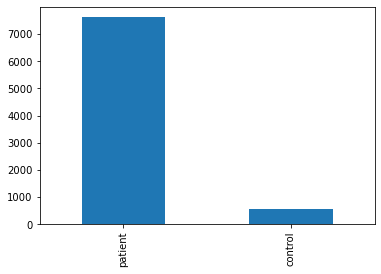

In [24]:
df_eda.patient_type.value_counts().plot(kind='bar')

<AxesSubplot:>

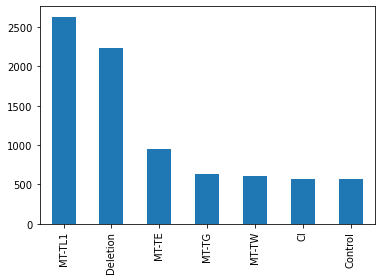

In [25]:
df_eda.subject_group.value_counts().plot(kind='bar')

In [26]:
df_eda.subject_group.value_counts()

MT-TL1      2633
Deletion    2240
MT-TE        946
MT-TG        628
MT-TW        602
CI           569
Control      568
Name: subject_group, dtype: int64

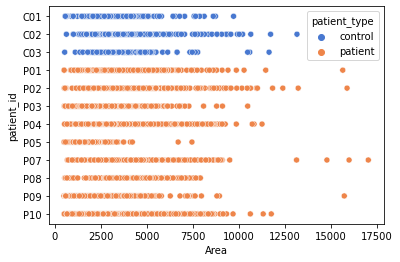

In [27]:
ax = sns.scatterplot(x="Area", y="patient_id", hue="patient_type", palette='muted',data=df_eda)

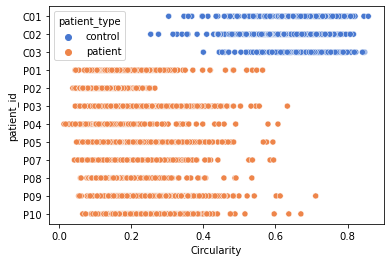

In [28]:
ax = sns.scatterplot(x="Circularity", y="patient_id", hue="patient_type", palette='muted',data=df_eda)

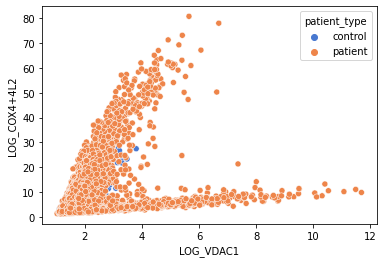

In [29]:
ax = sns.scatterplot(x="LOG_VDAC1", y="LOG_COX4+4L2", hue="patient_type", palette='muted',data=df_eda)

In [30]:
import matplotlib.pyplot as plt

grouped = df.groupby("patient_type")

grouped = df.groupby("LOG_COX4+4L2")

grouped = df.groupby(["patient_type", "LOG_COX4+4L2"])

print(grouped)

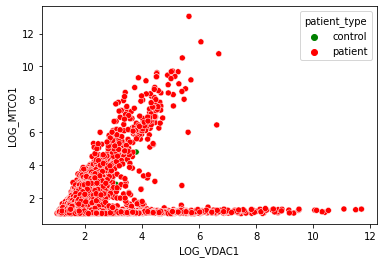

In [31]:
ax = sns.scatterplot(x="LOG_VDAC1", y="LOG_MTCO1", hue="patient_type", palette=['green','red'], data=df_eda)

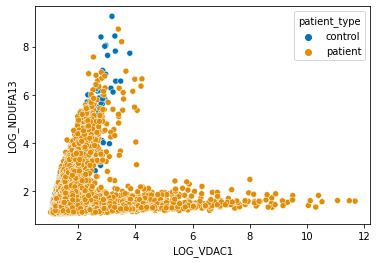

In [32]:
ax = sns.scatterplot(x="LOG_VDAC1", y="LOG_NDUFA13", hue="patient_type",palette='colorblind', data=df_eda)

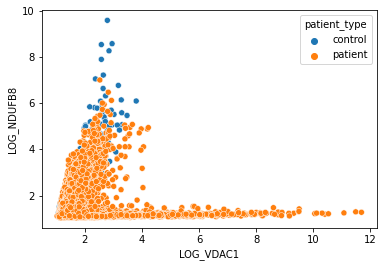

In [33]:
ax = sns.scatterplot(x="LOG_VDAC1", y="LOG_NDUFB8", hue="patient_type", data=df_eda)

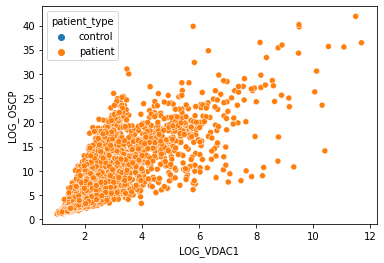

In [34]:
ax = sns.scatterplot(x="LOG_VDAC1", y="LOG_OSCP", hue="patient_type", data=df_eda)

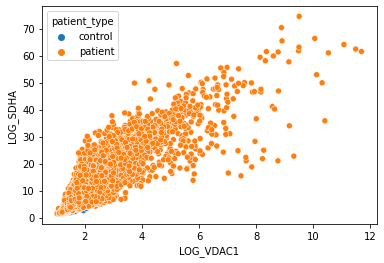

In [35]:
ax = sns.scatterplot(x="LOG_VDAC1", y="LOG_SDHA", hue="patient_type", data=df_eda)

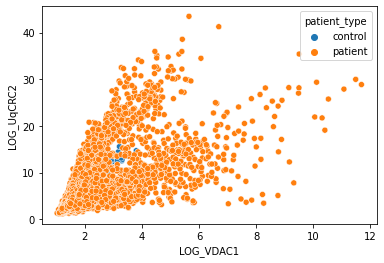

In [36]:
ax = sns.scatterplot(x="LOG_VDAC1", y="LOG_UqCRC2", hue="patient_type", data=df_eda)

In [37]:
df_control= df_eda.patient_type=='control'

In [38]:
df_control

0        True
1        True
2        True
3        True
4        True
        ...  
8181    False
8182    False
8183    False
8184    False
8185    False
Name: patient_type, Length: 8186, dtype: bool

# Machine Learning

# Fibre Classification Using Random Forest

In [39]:
#importing necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [40]:
#Save patient type as lable and store charicteristing as x
label = df[['patient_type']]
x = df[['Area','Perimeter','LOG_NDUFA13','LOG_NDUFB8','Circularity','LOG_MTCO1', 'LOG_COX4+4L2', 'LOG_OSCP', 'LOG_SDHA', 'LOG_UqCRC2', 'LOG_VDAC1']]

In [41]:
# creating the train and test data
train_x, test_x, train_y,test_y = train_test_split(x,label, train_size=.75)
print("Train X: {} | Train Y: {}".format(train_x.shape,train_y.shape))
print("Test X:  {} | Test Y:  {}".format(test_x.shape,test_y.shape))

Train X: (6139, 11) | Train Y: (6139, 1)
Test X:  (2047, 11) | Test Y:  (2047, 1)


In [42]:
#run classifier
clf = RandomForestClassifier(n_jobs=10 , random_state=0)
clf.fit(train_x, train_y)

<ipython-input-42-b2ad4b9f510f>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(train_x, train_y)


RandomForestClassifier(n_jobs=10, random_state=0)

In [43]:
##Test one patient's fibres against control fibres - classify them into defective or not defective

In [44]:
clf.predict(test_x)
print(classification_report(test_y, clf.predict(test_x)))

              precision    recall  f1-score   support

     control       0.96      0.94      0.95       129
     patient       1.00      1.00      1.00      1918

    accuracy                           0.99      2047
   macro avg       0.98      0.97      0.97      2047
weighted avg       0.99      0.99      0.99      2047



Feature ranking:
1. feature 4 Area (0.656578)
2. feature 0 Perimeter (0.092750)
3. feature 1 LOG_NDUFA13 (0.067526)
4. feature 3 LOG_NDUFB8 (0.041426)
5. feature 9 Circularity (0.031045)
6. feature 10 LOG_MTCO1 (0.030763)
7. feature 8 LOG_COX4+4L2 (0.019132)
8. feature 2 LOG_OSCP (0.017871)
9. feature 7 LOG_SDHA (0.017258)
10. feature 6 LOG_UqCRC2 (0.014174)
11. feature 5 LOG_VDAC1 (0.011477)


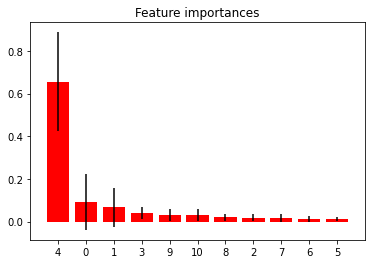

In [45]:
importances = clf.feature_importances_

std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(train_x.shape[1]):
    print("%d. feature %d %s (%f)" % (f + 1, indices[f], train_x.columns[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(train_x.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(train_x.shape[1]), indices)
plt.xlim([-1, train_x.shape[1]])
plt.show()

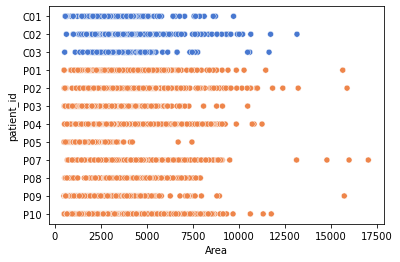

In [73]:
ax = sns.scatterplot(x="Area", y="patient_id", hue="patient_type", palette='muted',legend=False,data=df_eda)

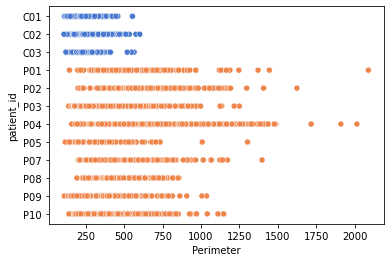

In [74]:
ax = sns.scatterplot(x="Perimeter", y="patient_id", hue="patient_type", palette='muted',legend=False,data=df_eda)

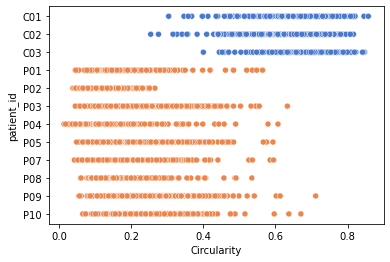

In [75]:
ax = sns.scatterplot(x="Circularity", y="patient_id", hue="patient_type", palette='muted',legend=False,data=df_eda)

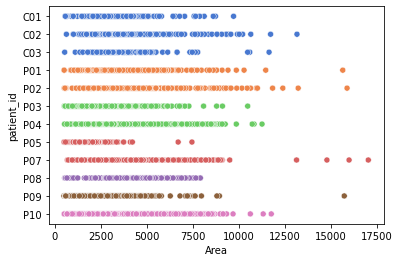

In [49]:
ax = sns.scatterplot(x="Area", y="patient_id", hue="subject_group", palette='muted',legend=False,data=df_eda)

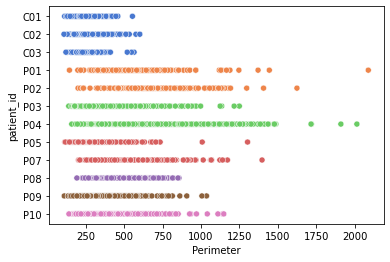

In [50]:
ax = sns.scatterplot(x="Perimeter", y="patient_id", hue="subject_group", palette='muted',legend=False,data=df_eda)

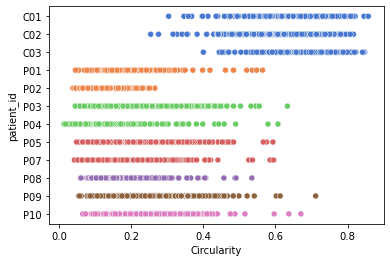

In [51]:
ax = sns.scatterplot(x="Circularity", y="patient_id", hue="subject_group", palette='muted',legend=False,data=df_eda)

# Fibre Classification Using Multiclass Classification Algorithms

In [52]:
#using multiclass classification algorithms considering the individuals have been grouped 
#into groups either containing the disease or not.

In [53]:
#1 Decision Tree Classification

In [54]:
# importing necessary libraries
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [77]:
# Y ==> Label, X ==> Features
Y = df2[['patient_type']]
X = df2[['Circularity', 'Area', 'Perimeter', 'LOG_COX4+4L2','LOG_MTCO1', 'LOG_NDUFA13', 'LOG_NDUFB8', 'LOG_OSCP', 'LOG_SDHA', 'LOG_UqCRC2', 'LOG_VDAC1']]

In [58]:
# dividing X and Y into train and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 0)

In [59]:
#training a DescisionTreeClassifier
dtree_model = DecisionTreeClassifier().fit(X_train, Y_train)
dtree_predictions = dtree_model.predict(X_test)
print(dtree_predictions)

print("Accuracy:",metrics.accuracy_score(Y_test, dtree_predictions))


['patient' 'patient' 'patient' ... 'control' 'patient' 'patient']
Accuracy: 0.9882755251587689


In [60]:
# accuracy is at 98.88% which is very good showing that it is likely for this algorithm 
# to predict accurately the label an individual should receive.

In [61]:
#2 K-Nearest Neighbour

In [62]:
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [63]:
Y = df2[['patient_type']]
X = df2[['Circularity', 'Area', 'LOG_COX4+4L2','LOG_MTCO1', 'LOG_NDUFA13', 'LOG_NDUFB8', 'LOG_OSCP', 'LOG_SDHA', 'LOG_UqCRC2', 'LOG_VDAC1']]

In [79]:
# dividing X, y into train and test data
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state = 0)

In [80]:
# training a KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7).fit(x_train, y_train)
knn_predictions = knn.predict(x_test) 

/Users/frestie/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [81]:
# accuracy on X_test
accuracy = knn.score(x_test, y_test)
print (accuracy)

0.9882755251587689


In [67]:
# accuracy is at 98.83% which is also very good showing that it is likely for this
# algorithm to predict accurately the label an individual should receive.
# It's accuracy appears to be as good as the decision tree classiifcation.

# Fibre Classification Using Clustering Algorithms

In [68]:
# K-means Clustering

In [82]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from time import time
from mpl_toolkits.mplot3d import Axes3D

In [83]:
Y = df2[['patient_type']]
X = df2[['Circularity', 'Area', 'LOG_COX4+4L2','LOG_MTCO1', 'LOG_NDUFA13', 'LOG_NDUFB8', 'LOG_OSCP', 'LOG_SDHA', 'LOG_UqCRC2', 'LOG_VDAC1']]

In [88]:
Y.patient_type = Y.patient_type.astype("category")
Y.patient_type = Y.patient_type.cat.codes
Y.patient_type = Y.patient_type.astype("int")

/Users/frestie/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [89]:
cls = KMeans(n_clusters = 2)
L = cls.fit_predict(X)
print(L)

[1 1 0 ... 1 1 1]


AttributeError: 'KMeans' object has no attribute 'L_'

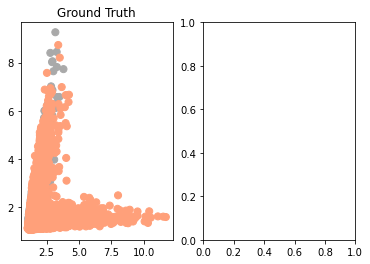

In [94]:
color_theme = np.array(['darkgray', 'lightsalmon','powderblue'])

plt.subplot(1,2,1)

plt.scatter(x=X.LOG_VDAC1, y=X.LOG_NDUFA13, c=color_theme[Y.patient_type], s=50 )
plt.title('Ground Truth')

plt.subplot(1,2,2)
plt.scatter(x=X.LOG_VDAC1, y=X.LOG_NDUFA13 , c=color_theme[cls.Y_], s=50 ) ## issueas with code on this line
plt.title('Predictions')

In [ ]:
sample_size = len(X)
def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels.patient_type, estimator.labels_),
             metrics.completeness_score(labels.patient_type, estimator.labels_),
             metrics.v_measure_score(labels.patient_type, estimator.labels_),
             metrics.adjusted_rand_score(labels.patient_type, estimator.labels_),
             metrics.adjusted_mutual_info_score(labels.patient_type,  estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))

bench_k_means(KMeans(init='k-means++', n_clusters=2, n_init=10),
              name="k-means++", data=X)

bench_k_means(KMeans(init='random', n_clusters=2, n_init=10),
              name="random", data=X)

# Fibre Classification Considering  Imbalanced Dataset

## Clustering based ML 

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from time import time
from mpl_toolkits.mplot3d import Axes3D

df_cml = df

X = df_cml[['Area', 'AspectRatio', 'Perimeter', 'Circularity', 'LOG_COX4+4L2','LOG_MTCO1', 'LOG_NDUFA13', 'LOG_NDUFB8', 'LOG_OSCP', 'LOG_SDHA', 'LOG_UqCRC2', 'LOG_VDAC1'  ]]
labels = df_cml[['patient_type']]

labels.patient_type = labels.patient_type.astype("category")
labels.patient_type = labels.patient_type.cat.codes
labels.patient_type = labels.patient_type.astype("int")

cls = KMeans(n_clusters = 2)
cls.fit(X)

In [ ]:
color_theme = np.array(['darkgray', 'lightsalmon','powderblue'])

plt.subplot(1,2,1)

plt.scatter(x=X.LOG_VDAC1, y=X.LOG_NDUFA13 , c=color_theme[labels.patient_type], s=50 )
plt.title('Ground Truth')

plt.subplot(1,2,2)
plt.scatter(x=X.LOG_VDAC1, y=X.LOG_NDUFA13 , c=color_theme[cls.labels_], s=50 )
plt.title('Predictions')


In [ ]:
sample_size = len(X)
def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels.patient_type, estimator.labels_),
             metrics.completeness_score(labels.patient_type, estimator.labels_),
             metrics.v_measure_score(labels.patient_type, estimator.labels_),
             metrics.adjusted_rand_score(labels.patient_type, estimator.labels_),
             metrics.adjusted_mutual_info_score(labels.patient_type,  estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))

bench_k_means(KMeans(init='k-means++', n_clusters=2, n_init=10),
              name="k-means++", data=X)

bench_k_means(KMeans(init='random', n_clusters=2, n_init=10),
              name="random", data=X)

### Feature Engineering

In [ ]:
X = df_cml[['Area', 'AspectRatio', 'Perimeter', 'Circularity', 'LOG_COX4+4L2','LOG_MTCO1', 'LOG_NDUFA13', 'LOG_NDUFB8', 'LOG_OSCP', 'LOG_SDHA', 'LOG_UqCRC2', 'LOG_VDAC1'  ]]
labels = df_cml[['patient_type']]

labels.patient_type = labels.patient_type.astype("category")
labels.patient_type = labels.patient_type.cat.codes
labels.patient_type = labels.patient_type.astype("int")

cls = KMeans(n_clusters = 2)
cls.fit(X)

In [ ]:
color_theme = np.array(['darkgray', 'lightsalmon','powderblue'])

plt.subplot(1,2,1)

plt.scatter(x=X.LOG_VDAC1, y=X.LOG_NDUFA13 , c=color_theme[labels.patient_type], s=50 )
plt.title('Ground Truth')

plt.subplot(1,2,2)
plt.scatter(x=X.LOG_VDAC1, y=X.LOG_NDUFA13 , c=color_theme[cls.labels_], s=50 )
plt.title('Predictions')


In [ ]:
print(classification_report(labels.patient_type,cls.labels_))

### Using Polar dimensions

In [ ]:
X = df_cml[['Area', 'AspectRatio', 'Perimeter', 'Circularity', 'THETA_COX4+4L2','THETA_MTCO1', 'THETA_NDUFA13', 'THETA_NDUFB8', 'THETA_OSCP', 'THETA_SDHA', 'THETA_UqCRC2'  ]]
labels = df_cml[['patient_type']]

labels.patient_type = labels.patient_type.astype("category")
labels.patient_type = labels.patient_type.cat.codes
labels.patient_type = labels.patient_type.astype("int")

cls = KMeans(n_clusters = 2)
cls.fit(X)




In [ ]:
print(classification_report(labels.patient_type,cls.labels_))

### PCA

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=6)

pca.fit(X)

X_pca = pca.transform(X)


In [ ]:
labels = df_cml[['patient_type']]

labels.patient_type = labels.patient_type.astype("category")

labels.patient_type = labels.patient_type.cat.codes

labels.patient_type = labels.patient_type.astype("int")


cls = KMeans(n_clusters = 2)
cls.fit(X_pca)

In [ ]:
print(classification_report(labels.patient_type,cls.labels_))

### using subject_group

In [ ]:
labels = df_cml[['subject_group']]

labels.subject_group = labels.subject_group.astype("category")

labels.subject_group = labels.subject_group.cat.codes

labels.subject_group = labels.subject_group.astype("int")

cls = KMeans(n_clusters = 7)
cls.fit(X_pca)

In [ ]:
print(classification_report(labels.subject_group,cls.labels_))

## GMM

In [ ]:
from sklearn.mixture import GaussianMixture as GMM

X = df_cml[['Area', 'AspectRatio', 'Perimeter', 'Circularity', 'THETA_COX4+4L2','THETA_MTCO1', 'THETA_NDUFA13', 'THETA_NDUFB8', 'THETA_OSCP', 'THETA_SDHA', 'THETA_UqCRC2'  ]]
labels = df2[['patient_type']]

labels.patient_type = labels.patient_type.astype("category")
labels.patient_type = labels.patient_type.cat.codes
labels.patient_type = labels.patient_type.astype("int")

cls = GMM(n_components = 2)
cls.fit(X)

In [ ]:
predictLabels = cls.fit_predict(X,X)

print(classification_report(labels.patient_type,predictLabels))

In [ ]:
labels = df_cml[['subject_group']]

labels.subject_group = labels.subject_group.astype("category")

labels.subject_group = labels.subject_group.cat.codes

labels.subject_group = labels.subject_group.astype("int")

cls = GMM(n_components = 2)
cls.fit(X)

In [ ]:
predictLabels = cls.fit_predict(X,X)

print(classification_report(labels.subject_group,predictLabels))